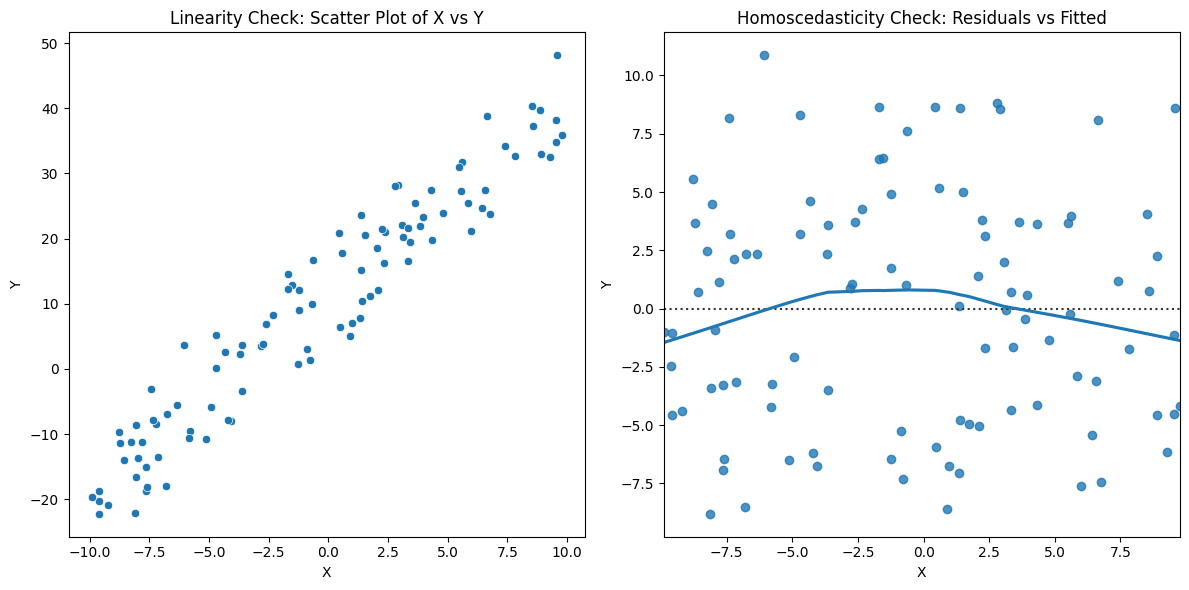

<Figure size 600x600 with 0 Axes>

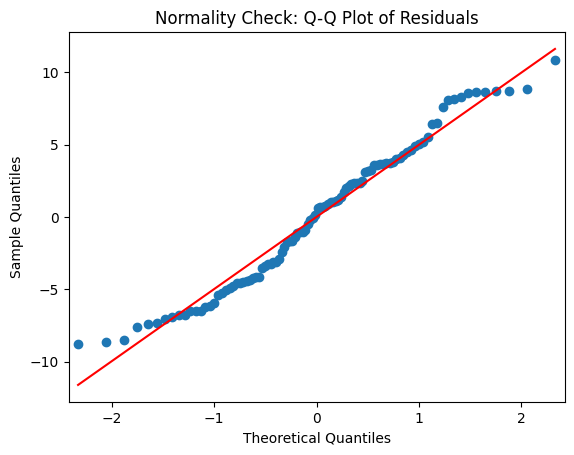

Shapiro-Wilk test: ShapiroResult(statistic=0.9672574400901794, pvalue=0.01368639711290598)
Durbin-Watson statistic: 2.0832252321235343


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Set the random seed for reproducibility
np.random.seed(0)

# Generate independent variable (x) and normally distributed errors (epsilon)
x = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 5, 100)

# Create a dependent variable (y) with a linear relationship to x
# Here, y = 3x + 10 + error
y = 3 * x + 10 + epsilon

# Create a DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Fit a linear regression model
model = ols('Y ~ X', data=data).fit()

# Plot for Linearity and Homoscedasticity
plt.figure(figsize=(12, 6))

# Linearity
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', data=data)
plt.title('Linearity Check: Scatter Plot of X vs Y')

# Homoscedasticity
plt.subplot(1, 2, 2)
sns.residplot(x='X', y='Y', data=data, lowess=True)
plt.title('Homoscedasticity Check: Residuals vs Fitted')

plt.tight_layout()
plt.show()

# Normality of Errors
plt.figure(figsize=(6, 6))
sm.qqplot(model.resid, line='s')
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk test:", shapiro_test)

# Durbin-Watson Test for Independence
durbin_watson_stat = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson statistic:", durbin_watson_stat)
